# Estimating π using a Monte Carlo simulation

This notebook is a Python/Jupyter version of your original MATLAB code.  
We estimate π by randomly sampling points inside the unit square `[0, 1] × [0, 1]` and
checking whether they fall inside the **quarter of a circle** of radius 1 centered at the origin.

For each point `(x, y)`, if `x² + y² < 1`, it lies inside the quarter-circle.  
The ratio of points inside the quarter-circle to all sampled points approximates the area of the quarter-circle,
which is `π/4`. Therefore, `π ≈ 4 × (number_inside / total_points)`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(N=100000, random_seed=None):
    """Estimate π using Monte Carlo sampling of a quarter circle in the unit square.

    Parameters
    ----------
    N : int
        Number of random points to sample.
    random_seed : int or None
        Optional seed for reproducibility.

    Returns
    -------
    float
        Monte Carlo estimate of π.
    """
    if N <= 0:
        raise ValueError("N must be a positive integer")

    rng = np.random.default_rng(random_seed)

    # Sample N random points in the unit square [0, 1] × [0, 1]
    x = rng.random(N)
    y = rng.random(N)

    # Points inside the quarter-circle of radius 1 satisfy x^2 + y^2 < 1
    inside = x**2 + y**2 < 1.0

    # Fraction of points inside the quarter-circle
    fraction_inside = inside.mean()

    # Area of the quarter-circle ≈ fraction_inside, so π ≈ 4 × fraction_inside
    pi_estimate = 4.0 * fraction_inside
    return pi_estimate

# Quick example
approx_pi = estimate_pi(N=100_000, random_seed=0)
print(f"Estimated π: {approx_pi:.6f}")
print(f"Actual π:    {np.pi:.6f}")


Estimated π: 3.144640
Actual π:    3.141593


## Visualising the quarter-circle inside the unit square

The plot below shows random sample points in the unit square `[0, 1] × [0, 1]`.  
Points **inside** the quarter-circle (`x² + y² < 1`) are marked separately from those **outside**.

This helps build intuition for why the fraction of points inside the quarter-circle approximates `π/4`.


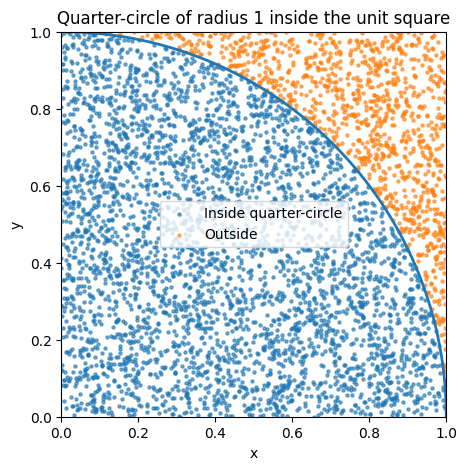

Estimated π from this sample: 3.128800


In [2]:
def plot_quarter_circle(N=5000, random_seed=0):
    """Plot a Monte Carlo sample of points in the unit square and highlight
    which ones lie inside the quarter-circle of radius 1.

    Parameters
    ----------
    N : int
        Number of random points to sample for the visualisation.
    random_seed : int
        Seed for reproducibility of the scatter plot.
    """
    rng = np.random.default_rng(random_seed)
    x = rng.random(N)
    y = rng.random(N)
    inside = x**2 + y**2 < 1.0

    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot points inside the quarter-circle
    ax.scatter(x[inside], y[inside], s=5, alpha=0.6, label="Inside quarter-circle")

    # Plot points outside the quarter-circle
    ax.scatter(x[~inside], y[~inside], s=5, alpha=0.6, label="Outside")

    # Draw the quarter-circle boundary x^2 + y^2 = 1 for x, y >= 0
    theta = np.linspace(0, np.pi / 2, 300)
    ax.plot(np.cos(theta), np.sin(theta), linewidth=2)

    ax.set_aspect("equal")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Quarter-circle of radius 1 inside the unit square")
    ax.legend()
    plt.show()

    # Also print out a π estimate using the same points
    fraction_inside = inside.mean()
    pi_estimate = 4.0 * fraction_inside
    print(f"Estimated π from this sample: {pi_estimate:.6f}")


# Run the visualisation
plot_quarter_circle(N=5000, random_seed=0)


## Relation to the original MATLAB code

Your original MATLAB script did the following:

```matlab
% Monte Carlo simulation to estimate pi
N = 100000000;
X = rand(N,1);
Y = rand(N,1);
P = NaN(N,1);
for i = 1:N
    if X(i,1)^2 + Y(i,1)^2 < 1
        P(i,1) = 1;
    else
        P(i,1) = 0;
    end
end
S = sum(P) / N;
Solon_pi = 4 * S;
```

In this notebook:

- `N` is the same number of random points.
- `x` and `y` are the same as `X` and `Y`.
- `inside` plays the role of `P`, marking whether a point is inside the quarter-circle.
- `fraction_inside = inside.mean()` is the same as `S = sum(P)/N`.
- `pi_estimate` or `approx_pi` is the same idea as `Solon_pi`, but renamed to `estimate_pi`.
